In [0]:
from google.colab import drive
import sys

drive.mount('/content/drive')
sys.path.append('drive/My Drive/Colab Notebooks')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import torchvision.datasets
import torch
import random
import numpy as np
from LeNet5 import *

In [0]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
def trainig(neural_network):

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    neural_network = neural_network.to(device)
    
    global X_test, y_test, X_train, y_train
    
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(neural_network.parameters(), lr=1.0e-3)

    batch_size = 100

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(150):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
          
            batch_indexes = order[start_index:start_index+batch_size]
          
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = neural_network.forward(X_batch) 

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
          
        test_preds = neural_network.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test).data.cpu())
      
        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)
      
        print("error rate: " + str(1 - accuracy))

    return test_accuracy_history

In [0]:
FASHION_train = torchvision.datasets.FashionMNIST('./', download=True, train=True)
FASHION_test = torchvision.datasets.FashionMNIST('./', download=True, train=False)

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


In [0]:
X_train = FASHION_train.train_data
y_train = FASHION_train.train_labels
X_test = FASHION_test.test_data
y_test = FASHION_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [0]:
lenet5 = LeNet5()
accuracy_history = trainig(lenet5)

error rate: tensor(0.1943)
error rate: tensor(0.1775)
error rate: tensor(0.1491)
error rate: tensor(0.1367)
error rate: tensor(0.1541)
error rate: tensor(0.1263)
error rate: tensor(0.1290)
error rate: tensor(0.1390)
error rate: tensor(0.1338)
error rate: tensor(0.1301)
error rate: tensor(0.1283)
error rate: tensor(0.1173)
error rate: tensor(0.1205)
error rate: tensor(0.1312)
error rate: tensor(0.1137)
error rate: tensor(0.1209)
error rate: tensor(0.1229)
error rate: tensor(0.1257)
error rate: tensor(0.1161)
error rate: tensor(0.1210)
error rate: tensor(0.1083)
error rate: tensor(0.1111)
error rate: tensor(0.1147)
error rate: tensor(0.1076)
error rate: tensor(0.1151)
error rate: tensor(0.1081)
error rate: tensor(0.1056)
error rate: tensor(0.1066)
error rate: tensor(0.1087)
error rate: tensor(0.1101)
error rate: tensor(0.1089)
error rate: tensor(0.1094)
error rate: tensor(0.1129)
error rate: tensor(0.1040)
error rate: tensor(0.1081)
error rate: tensor(0.1093)
error rate: tensor(0.1079)
e

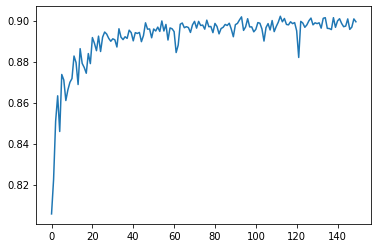

In [0]:
plt.plot(accuracy_history);

In [0]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.numpy(), lenet5.forward(X_test).argmax(dim=1).data.cpu().numpy()))

[[843   3  20  17   3   1 103   0  10   0]
 [  1 977   1  10   2   0   7   0   2   0]
 [ 18   0 859  10  70   0  41   0   2   0]
 [  7  13  16 904  35   0  23   0   2   0]
 [  0   1  77  28 846   0  46   0   2   0]
 [  0   0   0   0   0 968   0  22   1   9]
 [102   3  72  29  75   0 705   0  13   1]
 [  0   0   0   0   0  14   0 958   1  27]
 [  3   1   3   9   2   1   3   4 973   1]
 [  0   0   1   0   0   7   0  31   0 961]]
